# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Matthew Nathan Limahardja
- **Email:** nathanlimahardja@gmail.com
- **ID Dicoding:** nathan_limahardja

## Menentukan Pertanyaan Bisnis
- Bagaimana keadaan lingkungan mempengaruhi penjualan?
- Bagaimana performa user setiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd

## Data Wrangling
### Gathering Data

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
391,392,2012-01-27,1,1,1,0,5,1,2,0.425000,0.415383,0.741250,0.342667,269,3187,3456
525,526,2012-06-09,2,1,6,0,6,0,1,0.710833,0.648367,0.437083,0.144287,2708,4790,7498
74,75,2011-03-16,1,0,3,0,3,1,2,0.365217,0.366930,0.776522,0.203117,321,1871,2192
549,550,2012-07-03,3,1,7,0,2,1,1,0.780833,0.702650,0.492083,0.126237,1052,5608,6660
660,661,2012-10-22,4,1,10,0,1,1,1,0.487500,0.482942,0.568333,0.081483,830,6228,7058
282,283,2011-10-10,4,0,10,1,1,0,1,0.570833,0.542925,0.733750,0.042304,1514,3603,5117
153,154,2011-06-03,2,0,6,0,5,1,1,0.620000,0.587133,0.354167,0.253121,898,4414,5312
286,287,2011-10-14,4,0,10,0,5,1,2,0.550833,0.529675,0.716250,0.223883,529,3115,3644
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
399,400,2012-02-04,1,1,2,0,6,0,2,0.264167,0.272725,0.779583,0.121896,384,2448,2832


### Assessing Data

In [3]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


### Cleaning Data

In [4]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tidak ada duplicate, missing values
- Data type masing masing kolom sudah benar kecuali dteday

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [5]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [21]:
day_by_weathersit = day_df.groupby(['weathersit']).agg({
    'cnt': 'sum'
}).reset_index()
day_by_weathersit['weathersit'] = day_by_weathersit['weathersit'].map({
    1: "Clear",
    2: "Mist",
    3: "Snow/Rain",
    4: "Storm"
})
print(day_by_weathersit)

  weathersit      cnt
0      Clear  2257952
1       Mist   996858
2  Snow/Rain    37869


In [15]:
day_by_year = day_df.groupby(['yr']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
}).reset_index()
day_by_year['yr'] += 1
print(day_by_year)

   yr  casual  registered      cnt
0   1  247252      995851  1243103
1   2  372765     1676811  2049576


**Insight:**
- Penyewa umunya menyewa pada cuaca yang cerah dibanding cuaca yang buruk
- Terjadi peningkatan user pada tahun berikutnya baik yang casual dan registered

## Visualization

### Pertanyaan 1: Bagaimana keadaan lingkungan mempengaruhi penjualan?

<Axes: xlabel='weathersit'>

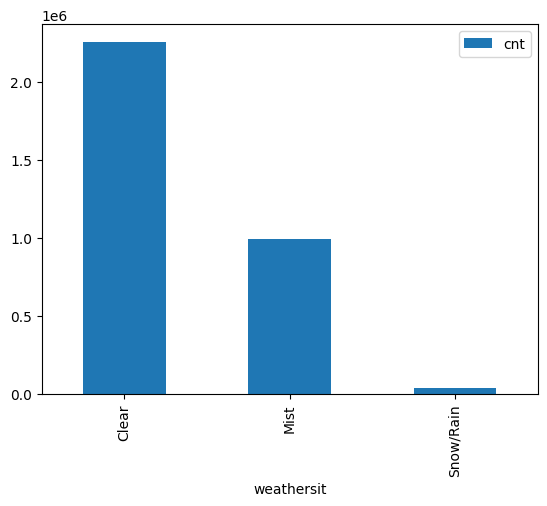

In [22]:
day_by_weathersit.plot(kind='bar', x='weathersit', y=['cnt'])

### Pertanyaan 2: Bagaimana performa user setiap tahunnya?

<Axes: xlabel='yr'>

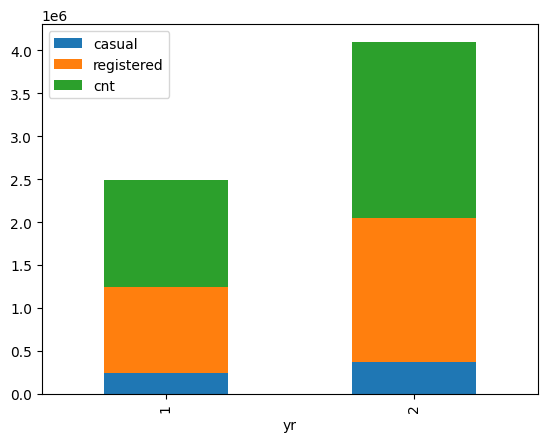

In [16]:
day_by_year.plot(kind='bar', x='yr', y=['casual', 'registered', 'cnt'], stacked=True)

**Insight:**
- Cuaca cerah sangat mempengaruhi user dalam menyewa sepeda
- Lebih banyak user yang bertipe registered

## Conclusion
#### Pertanyaan 1: Bagaimana keadaan lingkungan mempengaruhi penjualan? 
- Keadaan lingkungan yang cerah (Clear) cenderung lebih banyak yang menyewa
- Sebaliknya pada cuaca yang buruk (Snow/Rain) user yang menyewa turun drastis
#### Pertanyaan 2: Bagaimana performa user setiap tahunnya?
- User meningkat pesat setiap tahunnya terutama user yang registered
- User yang casual meningkat sedikit (tidak signifikan)